In [68]:
import pandas as pd

import os
import numpy as np
import matplotlib.pylab as plt
# import ray
# ray.init()
# import dask
# os.environ["MODIN_ENGINE"] = "ray"
# import modin.pandas as pd

In [54]:
# # largestfile = pd.read_csv(os.scandir('channel1csvs'))
# entriesscan = os.scandir('channel1csvs')
# for i in range(505):
#     csv = entriesscan.__next__()
#     if csv.name == '20220304.csv':
#         break
# csv = pd.read_csv(csv)      #I'm thinking that I need to standardize the size of the csvs, and I use the largest to start
# meters = []
# timestamps = []
# for row in range(len(csv)):
#     if not (csv.loc[row][1] in meters):
#         meters.append(csv.loc[row][1])
#     if not (csv.loc[row][2][11:16] in timestamps):
#         timestamps.append(csv.loc[row][2][11:16])
# currenttimestamp = csv.loc[1][2][11:16]
# currenttimestamploc = timestamps.index(currenttimestamp)
# for row in range(len(csv) - 1):
#     currenttimestamploc = (currenttimestamploc + row) % len(timestamps)
#     currenttimestamp = timestamps[currenttimestamploc]
#     if not csv.loc[row+1][2][11:16]  == currenttimestamp:
#         print("error!, loc: " + str(row))
#         break
# print(meters)
# print("length " + str(len(meters)))
# print(timestamps)
# print("num of rows " + str(len(csv)))
# # print(timestamps.index('00:30'))
# # print(pd.read_csv(os.walk('channel1csvs\20220304.csv')))

In [56]:
pandasarray = []
entrieslist = os.listdir('channel1csvs')
print(len(entrieslist))
entriesscan = os.scandir('channel1csvs')
for i in range(len(entrieslist)):
    csv = entriesscan.__next__()
    try:
        currentcsv = pd.read_csv(csv, header=None, usecols = [0, 1, 2, 6])
        currentcsv[0] = currentcsv[0].astype(np.int16)
        currentcsv[1] = currentcsv[1].astype("category")
        currentcsv[6] = currentcsv[6].astype(np.float64)
#         currentcsv["key"] = (str(currentcsv[0]) + str(currentcsv[2][11:16]))
#         currentcsv["key"] = currentcsv["key"].astype(np.int32)
#         currentcsv.set_index("key")
        currentcsv.columns = [0, 1, 2, 3]
        currentcsv[['date', 'time']] = currentcsv[2].str.split(' ', expand = True)
#         currentcsv['key'] = (str(currentcsv[0]) + str(currentcsv['time']))
#         currentcsv.set_index('key')
#         currentcsv[4] = str(currentcsv[0]+currentcsv[2][11:16])
    except:
        continue
    pandasarray.append(currentcsv)
print(pandasarray[249].head())
print(pandasarray[249].dtypes)
print(len(pandasarray))
# print(len(pandasarray[249]))

505
       0                 1                    2      3        date      time
0  11717  Softball Concess  2021-07-01 00:15:00  0.128  2021-07-01  00:15:00
1  11717  Softball Concess  2021-07-01 00:30:00  0.049  2021-07-01  00:30:00
2  11717  Softball Concess  2021-07-01 00:45:00  0.139  2021-07-01  00:45:00
3  11717  Softball Concess  2021-07-01 01:00:00  0.067  2021-07-01  01:00:00
4  11717  Softball Concess  2021-07-01 01:15:00  0.110  2021-07-01  01:15:00
0          int16
1       category
2         object
3        float64
date      object
time      object
dtype: object
496


In [57]:
nodes = {}
for day in range(len(pandasarray)):
    length = len(pandasarray[day])
    if length not in nodes:
        nodes.update({length : 1})
    else:
        nodes.update({length : nodes.get(length) + 1})
    if length == 775:
        print(pandasarray[day])
# print(nodes)
# print(sorted(nodes))

         0                                   1                    2      3  \
0    11717                    Softball Concess  2021-05-27 00:15:00  0.136   
1    11717                    Softball Concess  2021-05-27 00:30:00  0.095   
2    11717                    Softball Concess  2021-05-27 00:45:00  0.080   
3    11717                    Softball Concess  2021-05-27 01:00:00  0.135   
4    11719                    Softball MX Shop  2021-05-27 00:15:00  0.210   
..     ...                                 ...                  ...    ...   
770   1788  Old Athletics Ticket Office - AT&T  2021-05-27 01:00:00  0.070   
771   1789                  Meek Hall Addition  2021-05-27 00:15:00  0.006   
772   1789                  Meek Hall Addition  2021-05-27 00:30:00  0.006   
773   1789                  Meek Hall Addition  2021-05-27 00:45:00  0.005   
774   1789                  Meek Hall Addition  2021-05-27 01:00:00  0.006   

           date      time  
0    2021-05-27  00:15:00  
1    20

In [58]:
# merged = pandasarray[0].join(pandasarray[1][[2,3]], how = "outer", on=('key'), lsuffix = '_0', rsuffix = '_1')
# for i in range(2,496):
#     merged = merged.join(pandasarray[i][[2,3]], how = "outer", on=('key'),lsuffix = ('_'+str(i-1)), rsuffix = ('_'+str(i)))
merged = pd.concat(pandasarray, ignore_index = True)
print(pandasarray[0])
print(merged)
# merged = merged.join(pandasarray[2], how = "inner", on=(0), suffixes=('', '_2'))

# print(merged)

           0                   1                    2      3        date  \
0      11717    Softball Concess  2020-10-20 00:15:00  0.047  2020-10-20   
1      11717    Softball Concess  2020-10-20 00:30:00  0.048  2020-10-20   
2      11717    Softball Concess  2020-10-20 00:45:00  0.136  2020-10-20   
3      11717    Softball Concess  2020-10-20 01:00:00  0.179  2020-10-20   
4      11717    Softball Concess  2020-10-20 01:15:00  0.047  2020-10-20   
...      ...                 ...                  ...    ...         ...   
18396   1789  Meek Hall Addition  2020-10-20 23:00:00  0.628  2020-10-20   
18397   1789  Meek Hall Addition  2020-10-20 23:15:00  0.628  2020-10-20   
18398   1789  Meek Hall Addition  2020-10-20 23:30:00  0.627  2020-10-20   
18399   1789  Meek Hall Addition  2020-10-20 23:45:00  0.628  2020-10-20   
18400   1789  Meek Hall Addition  2020-10-21 00:00:00  0.630  2020-10-21   

           time  
0      00:15:00  
1      00:30:00  
2      00:45:00  
3      01:00:00

In [59]:
print(merged.loc[(merged['date'] >= '2020-10-20') & (merged['date'] <= '2020-10-29')])

            0                   1                    2      3        date  \
0       11717    Softball Concess  2020-10-20 00:15:00  0.047  2020-10-20   
1       11717    Softball Concess  2020-10-20 00:30:00  0.048  2020-10-20   
2       11717    Softball Concess  2020-10-20 00:45:00  0.136  2020-10-20   
3       11717    Softball Concess  2020-10-20 01:00:00  0.179  2020-10-20   
4       11717    Softball Concess  2020-10-20 01:15:00  0.047  2020-10-20   
...       ...                 ...                  ...    ...         ...   
184423   1789  Meek Hall Addition  2020-10-29 22:45:00  0.005  2020-10-29   
184424   1789  Meek Hall Addition  2020-10-29 23:00:00  0.006  2020-10-29   
184425   1789  Meek Hall Addition  2020-10-29 23:15:00  0.005  2020-10-29   
184426   1789  Meek Hall Addition  2020-10-29 23:30:00  0.006  2020-10-29   
184427   1789  Meek Hall Addition  2020-10-29 23:45:00  0.006  2020-10-29   

            time  
0       00:15:00  
1       00:30:00  
2       00:45:00  

In [60]:
print(merged.loc[(merged[1] == 'Softball Concess')])

             0                 1                    2      3        date  \
0        11717  Softball Concess  2020-10-20 00:15:00  0.047  2020-10-20   
1        11717  Softball Concess  2020-10-20 00:30:00  0.048  2020-10-20   
2        11717  Softball Concess  2020-10-20 00:45:00  0.136  2020-10-20   
3        11717  Softball Concess  2020-10-20 01:00:00  0.179  2020-10-20   
4        11717  Softball Concess  2020-10-20 01:15:00  0.047  2020-10-20   
...        ...               ...                  ...    ...         ...   
9043527  11717  Softball Concess  2022-03-08 23:00:00  0.194  2022-03-08   
9043528  11717  Softball Concess  2022-03-08 23:15:00  0.119  2022-03-08   
9043529  11717  Softball Concess  2022-03-08 23:30:00  0.120  2022-03-08   
9043530  11717  Softball Concess  2022-03-08 23:45:00  0.109  2022-03-08   
9043531  11717  Softball Concess  2022-03-09 00:00:00  0.211  2022-03-09   

             time  
0        00:15:00  
1        00:30:00  
2        00:45:00  
3      

In [61]:
allowedbuilds = ['Softball Concess', "Meek Hall Addition"]
print(merged.loc[(merged[1].isin(allowedbuilds))].loc[(merged['date'] == '2020-10-20')]) #I can use a list and .isin()

           0                   1                    2      3        date  \
0      11717    Softball Concess  2020-10-20 00:15:00  0.047  2020-10-20   
1      11717    Softball Concess  2020-10-20 00:30:00  0.048  2020-10-20   
2      11717    Softball Concess  2020-10-20 00:45:00  0.136  2020-10-20   
3      11717    Softball Concess  2020-10-20 01:00:00  0.179  2020-10-20   
4      11717    Softball Concess  2020-10-20 01:15:00  0.047  2020-10-20   
...      ...                 ...                  ...    ...         ...   
18395   1789  Meek Hall Addition  2020-10-20 22:45:00  0.629  2020-10-20   
18396   1789  Meek Hall Addition  2020-10-20 23:00:00  0.628  2020-10-20   
18397   1789  Meek Hall Addition  2020-10-20 23:15:00  0.628  2020-10-20   
18398   1789  Meek Hall Addition  2020-10-20 23:30:00  0.627  2020-10-20   
18399   1789  Meek Hall Addition  2020-10-20 23:45:00  0.628  2020-10-20   

           time  
0      00:15:00  
1      00:30:00  
2      00:45:00  
3      01:00:00

In [64]:
times = []
for row in range(1000):
    if merged.loc[row]['time'] not in times:
        times.append(merged.loc[row]['time'])
    
print(times)
timekwh = []
for time in times:
    timekwh.append(merged.loc[(merged['time'] == time)][3].sum())
print(timekwh)
# sum1500 = merged.loc[(merged['time'] == '00:15:00')][3].sum()
# print(sum1500)
# print(merged.loc[(merged['time'] == '00:15:00')][3])
# merged.plot(x = 'time', y = 3)

['00:15:00', '00:30:00', '00:45:00', '01:00:00', '01:15:00', '01:30:00', '01:45:00', '02:00:00', '02:15:00', '02:30:00', '02:45:00', '03:00:00', '03:15:00', '03:30:00', '03:45:00', '04:00:00', '04:15:00', '04:30:00', '04:45:00', '05:00:00', '05:15:00', '05:30:00', '05:45:00', '06:00:00', '06:15:00', '06:30:00', '06:45:00', '07:00:00', '07:15:00', '07:30:00', '07:45:00', '08:00:00', '08:15:00', '08:30:00', '08:45:00', '09:00:00', '09:15:00', '09:30:00', '09:45:00', '10:00:00', '10:15:00', '10:30:00', '10:45:00', '11:00:00', '11:15:00', '11:30:00', '11:45:00', '12:00:00', '12:15:00', '12:30:00', '12:45:00', '13:00:00', '13:15:00', '13:30:00', '13:45:00', '14:00:00', '14:15:00', '14:30:00', '14:45:00', '15:00:00', '15:15:00', '15:30:00', '15:45:00', '16:00:00', '16:15:00', '16:30:00', '16:45:00', '17:00:00', '17:15:00', '17:30:00', '17:45:00', '18:00:00', '18:15:00', '18:30:00', '18:45:00', '19:00:00', '19:15:00', '19:30:00', '19:45:00', '20:00:00', '20:15:00', '20:30:00', '20:45:00', '21

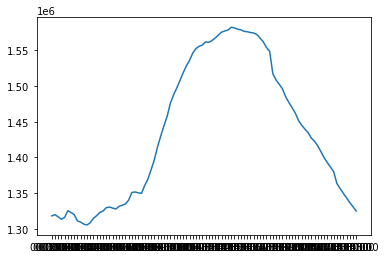

In [69]:
# res = {test_keys[i]: test_values[i] for i in range(len(test_keys))}
timekwhdict = {times[i] : timekwh[i] for i in range(len(times))}
# print(timekwhdict)
lists = sorted(timekwhdict.items())
x, y = zip(*lists)
plt.plot(x, y)
plt.show()

date
2020-10-20    312455.734
2020-10-21    318699.732
2020-10-22    331368.076
2020-10-23    321779.810
2020-10-24    256280.425
                 ...    
2022-03-05    299865.260
2022-03-06    319372.259
2022-03-07    308891.862
2022-03-08    287578.088
2022-03-09      2693.799
Name: 3, Length: 499, dtype: float64


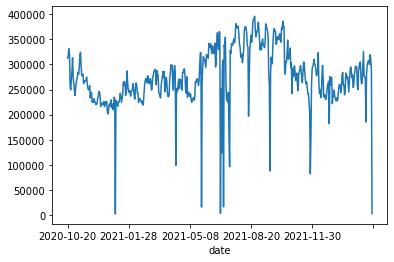

In [93]:
sums = merged.groupby('date')[3].sum()
print(sums)
ax = sums.plot(x = 'date', y = 3)
# merged.loc[(merged[1] == 'Softball Concess')].loc[(merged['date'] <= '2020-12-00')].plot(x = 'date', y = 3, kind = 'scatter')